In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV


#Read in both data sets with pandas 
df_train = pd.read_csv("au_train.csv")
df_test = pd.read_csv("au_test.csv")

df_train.replace(regex={'\?':'Other'},inplace=True)
df_test.replace(regex={'\?':'Other'},inplace=True)


# df_test.info()
# df_train.info()

# Expanding the categories into numerical data  0 and 1
df_test_2 = pd.get_dummies(data=df_test,drop_first=True)
df_train_2 = pd.get_dummies(data=df_train,drop_first=True)

# Test data set has a period in the class name and I'm removing it to make the code cleaner.
df_test_2.rename( columns={'class_ >50K.': 'class_ >50K'},inplace=True)

# Defining the X 
df_test_X =df_test_2.drop(columns=['class_ >50K'])
df_train_X =df_train_2.drop(columns=['class_ >50K'])
# df_train_X =df_train_2.drop(columns=['class_ >50K','native-country_ Holand-Netherlands'])

# Defining the y 
df_train_y=df_train_2['class_ >50K']
df_test_y=df_test_2['class_ >50K']
# df_train_X.drop(columns=['native_country_ Holand-Netherlands'],inplace=True)

# Dropping fnlwgt as it is the final weight from the census. 
# This could 
df_train_X.drop(columns=['fnlwgt'],inplace=True)
df_test_X.drop(columns=['fnlwgt'],inplace=True)

# df_train_X.info(verbose=True)
# df_test_X.info(verbose=True)

# Check for missing Columns after dummy variables
#Visually inspected the dummy variables
# Found one Column that was missing in the test data set that was in the training set
df_test_X['native-country_ Holand-Netherlands']=0

# df_test_2.info()
# df_train_2.info()
# df_test.head()
# df_train.head()

# Check on the ratio of people who made more and less than 50K 
# Just a numeric number, I found it was skewed from the visual inspection with plots.
# sum(df_train_y)/len(df_train_y)
# 1-sum(df_train_y)/len(df_train_y)
# sum(df_test_y)/len(df_test_y)
# df_test_X.describe()


In [49]:
# Initial model
# Selected Logistic Regression as it is the obvious choise when we have a binary classification
lr_train = LogisticRegressionCV()
classifier = lr_train.fit(X=df_train_X,y=df_train_y)
prediction_train_dataset = lr_train.predict(X=df_train_X)
prediction_test_dataset = lr_train.predict(X=df_train_X)

In [50]:
# Accuracy score for the trained model using the train data set
lr_train.score(X=df_train_X,y=df_train_y)

0.8523079757992691

In [51]:
# Accuracy score for the trained model using the test data set
lr_train.score(X=df_test_X,y=df_test_y)

0.8529574350469873

In [52]:
lr_train.predict_proba(df_test_X)

array([[0.99654089, 0.00345911],
       [0.84020651, 0.15979349],
       [0.61993181, 0.38006819],
       ...,
       [0.33234924, 0.66765076],
       [0.66468137, 0.33531863],
       [0.19565324, 0.80434676]])

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix
#ROC score
ROC_model = roc_auc_score(df_test_y,lr_train.predict_proba(df_test_X)[:,1])
print(ROC_model)
false_positive_r,true_positive_r ,thesholds= roc_curve(df_test_y,lr_train.predict_proba(df_test_X)[:,1])


0.9044351794176311


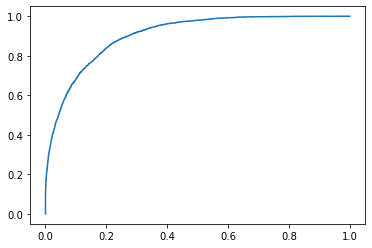

In [54]:
# Making the plot for the ROC curve
plt.figure()
plt.plot(false_positive_r,true_positive_r)
plt.show()

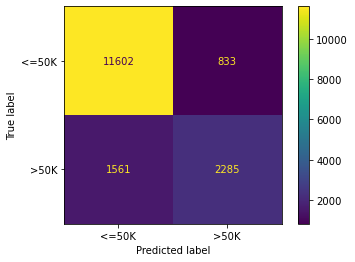

In [58]:
plot_confusion_matrix(lr_train, df_test_X,df_test_y,display_labels=['<=50K','>50K'])